In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
data = pd.read_csv("customer_churn.csv")  

In [17]:
data.head()  # Displays first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,CUST1,Male,0,Yes,Yes,45,80.64,1473.30,No
1,CUST2,Female,0,No,No,14,33.92,4863.64,Yes
2,CUST3,Male,1,No,No,24,109.83,448.65,No
3,CUST4,Male,0,Yes,No,70,102.93,5403.20,No
4,CUST5,Male,0,Yes,No,16,51.75,3939.53,No


In [15]:
print(data.info())   # Shows column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      500 non-null    object 
 1   gender          500 non-null    object 
 2   SeniorCitizen   500 non-null    int64  
 3   Partner         500 non-null    object 
 4   Dependents      500 non-null    object 
 5   tenure          500 non-null    int64  
 6   MonthlyCharges  500 non-null    float64
 7   TotalCharges    500 non-null    float64
 8   Churn           500 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB
None


In [18]:
data.dropna(inplace=True)  # Removes rows with missing values

In [22]:
data.fillna(data.select_dtypes(include=['number']).median(), inplace=True)

In [23]:
data = data.drop(columns=['customerID'])

In [24]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])  # Male = 1, Female = 0
data['Partner'] = encoder.fit_transform(data['Partner'])
data['Dependents'] = encoder.fit_transform(data['Dependents'])
data['Churn'] = encoder.fit_transform(data['Churn'])  # Yes = 1, No = 0

In [25]:
X = data.drop(columns=['Churn'])  
y = data['Churn']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Training the model

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82        69
           1       0.67      0.13      0.22        31

    accuracy                           0.71       100
   macro avg       0.69      0.55      0.52       100
weighted avg       0.70      0.71      0.63       100

Confusion Matrix:
 [[67  2]
 [27  4]]


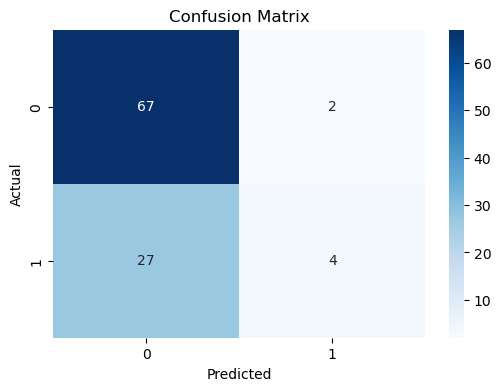

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

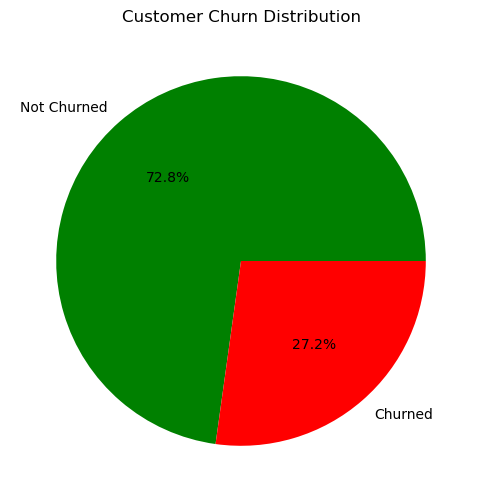

In [34]:
churn_counts = data['Churn'].value_counts()
labels = ['Not Churned', 'Churned']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Customer Churn Distribution')
plt.show()

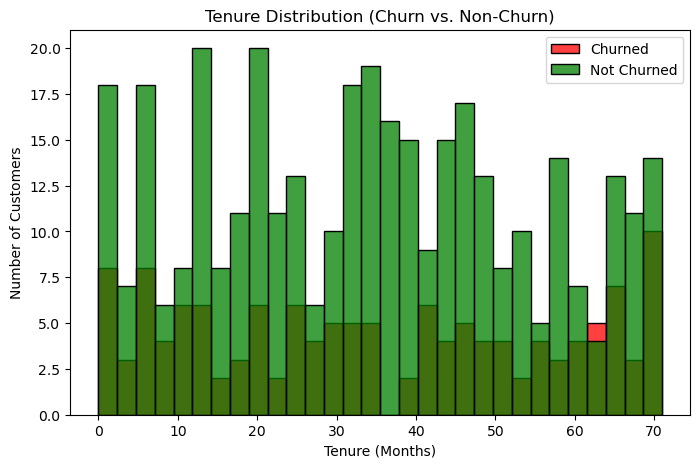

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(data[data['Churn'] == 1]['tenure'], bins=30, color='red', label='Churned')
sns.histplot(data[data['Churn'] == 0]['tenure'], bins=30, color='green', label='Not Churned')
plt.title('Tenure Distribution (Churn vs. Non-Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()